In [1]:
# imports
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import re

# Reading in the files and looking at the data frames:

1. flare_index: This is the data frame that gives the index, start_time, peak_time, end_time, NAR, and the x_ray class of the array.
2. flare_data: This data frame gives values of various parameters that explain what the Active regions looked like at various times.

In [2]:
# Read in the text file with the index, time, and class values for the MX flares:
file_path1 = "ABC_list.txt"
clean_data = pd.read_csv(file_path1)

In [3]:
clean_data

,Unnamed: 0,time_start,time_peak,time_end,nar,xray_class
0,0,2013-01-03 21:01:00.0,2013-01-03 21:08:00.0,2013-01-03 21:17:00.0,11640,B9.4
1,1,2010-10-18 13:02:00.0,2010-10-18 13:11:00.0,2010-10-18 13:20:00.0,11112,B4.5
2,2,2013-10-06 00:16:00.0,2013-10-06 00:51:00.0,2013-10-06 01:03:00.0,11857,B8.7
3,3,2012-01-09 20:01:00.0,2012-01-09 20:13:00.0,2012-01-09 20:28:00.0,11395,C2.6
4,4,2021-05-26 07:51:00.0,2021-05-26 08:00:00.0,2021-05-26 08:04:00.0,12826,C1.1
...,...,...,...,...,...,...
995,995,2012-09-10 21:14:00.0,2012-09-10 21:31:00.0,2012-09-10 21:35:00.0,11564,C2.2
996,996,2015-04-23 05:06:00.0,2015-04-23 05:18:00.0,2015-04-23 05:23:00.0,12324,C1.6
997,997,2012-07-12 07:23:00.0,2012-07-12 07:27:00.0,2012-07-12 07:46:00.0,11521,C1.0
998,998,2015-08-25 04:14:00.0,2015-08-25 04:20:00.0,2015-08-25 04:24:00.0,12403,C1.1


In [4]:
# Really bad code to change the string values in clean_data to datetime objects 
for i in range(len(clean_data["time_start"])):
    # split with white space and the colon :
    m = re.split('[" ", ":"]', clean_data["time_start"][i])
    # split the first part with "-" :
    n = m[0].split("-")
    # put n in place of 0 index of m :
    m.pop(0)
    m = n + m
    time = datetime.datetime(int(m[0]), int(m[1]), int(m[2]), int(m[3]), int(m[4]))
    clean_data["time_start"][i] = time

C:\Users\youar\AppData\Local\Temp\ipykernel_14632\2517073715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["time_start"][i] = time


In [5]:
file_path2 = "Data_ABC.csv"
flare_properties = pd.read_csv(file_path2)

In [6]:
flare_properties

,T_REC,NOAA_AR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,R_VALUE,AREA_ACR
0,2010.05.01_00:00:00.000_TAI,11067,6.510000e+21,28.3,66.8,84.5,32.2,-0.13200,5.780000e+12,0.003100,271.0,30.30,2.380000e+12,2240.0,2.910000e+22,24.1,8.69,3.34,108.0
1,2010.05.01_00:12:00.000_TAI,11067,6.520000e+21,29.7,68.3,90.8,32.3,-0.11400,5.650000e+12,-0.001280,264.0,12.90,6.360000e+11,2460.0,3.310000e+22,25.0,11.40,3.64,106.0
2,2010.05.01_00:24:00.000_TAI,11067,6.920000e+21,28.4,67.7,89.1,32.4,0.06120,6.490000e+12,0.001070,308.0,11.50,1.170000e+12,2370.0,3.350000e+22,23.8,9.49,3.36,111.0
3,2010.05.01_00:36:00.000_TAI,11067,6.970000e+21,28.0,67.2,85.3,32.0,0.05330,6.190000e+12,0.001690,297.0,17.80,2.020000e+12,2190.0,3.070000e+22,24.0,9.01,3.54,109.0
4,2010.05.01_00:48:00.000_TAI,11067,7.230000e+21,27.0,64.8,76.3,32.6,0.01160,5.800000e+12,0.000308,302.0,3.26,8.280000e+11,1970.0,2.780000e+22,21.1,6.13,3.07,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155550,2021.10.27_21:12:00.000_TAI,12887,2.470000e+22,47.3,109.0,113.0,61.0,-0.03560,4.560000e+13,0.018100,2380.0,730.00,3.070000e+13,7430.0,3.970000e+23,38.9,34.60,4.64,1290.0
155551,2021.10.27_21:24:00.000_TAI,12887,2.460000e+22,47.3,108.0,113.0,60.7,-0.00747,4.530000e+13,0.017500,2370.0,703.00,2.920000e+13,7450.0,3.970000e+23,38.9,34.60,4.62,1290.0
155552,2021.10.27_21:36:00.000_TAI,12887,2.420000e+22,47.2,109.0,113.0,61.3,0.15600,4.440000e+13,0.018400,2360.0,722.00,3.020000e+13,7570.0,3.940000e+23,39.0,34.90,4.61,1280.0
155553,2021.10.27_21:48:00.000_TAI,12887,2.420000e+22,47.5,108.0,113.0,60.8,0.07590,4.470000e+13,0.019200,2350.0,760.00,3.190000e+13,7550.0,3.970000e+23,39.2,34.90,4.59,1280.0


In [7]:
# Really bad code for changing the string values from "T_REC" to datetime values:
for i in range(len(flare_properties["T_REC"])):
    m = re.split('["_", ":", "."]', flare_properties["T_REC"][i])
    m = m[0:5]
    time = datetime.datetime(int(m[0]), int(m[1]), int(m[2]), int(m[3]), int(m[4]))
    flare_properties["T_REC"][i] = time

C:\Users\youar\AppData\Local\Temp\ipykernel_14632\1270949082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flare_properties["T_REC"][i] = time


In [8]:
# Testing that both clean_data and flare_properties have datetime objects now:
flare_properties = flare_properties.reset_index()
flare_properties

,index,T_REC,NOAA_AR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,R_VALUE,AREA_ACR
0,0,2010-05-01 00:00:00,11067,6.510000e+21,28.3,66.8,84.5,32.2,-0.13200,5.780000e+12,0.003100,271.0,30.30,2.380000e+12,2240.0,2.910000e+22,24.1,8.69,3.34,108.0
1,1,2010-05-01 00:12:00,11067,6.520000e+21,29.7,68.3,90.8,32.3,-0.11400,5.650000e+12,-0.001280,264.0,12.90,6.360000e+11,2460.0,3.310000e+22,25.0,11.40,3.64,106.0
2,2,2010-05-01 00:24:00,11067,6.920000e+21,28.4,67.7,89.1,32.4,0.06120,6.490000e+12,0.001070,308.0,11.50,1.170000e+12,2370.0,3.350000e+22,23.8,9.49,3.36,111.0
3,3,2010-05-01 00:36:00,11067,6.970000e+21,28.0,67.2,85.3,32.0,0.05330,6.190000e+12,0.001690,297.0,17.80,2.020000e+12,2190.0,3.070000e+22,24.0,9.01,3.54,109.0
4,4,2010-05-01 00:48:00,11067,7.230000e+21,27.0,64.8,76.3,32.6,0.01160,5.800000e+12,0.000308,302.0,3.26,8.280000e+11,1970.0,2.780000e+22,21.1,6.13,3.07,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155550,155550,2021-10-27 21:12:00,12887,2.470000e+22,47.3,109.0,113.0,61.0,-0.03560,4.560000e+13,0.018100,2380.0,730.00,3.070000e+13,7430.0,3.970000e+23,38.9,34.60,4.64,1290.0
155551,155551,2021-10-27 21:24:00,12887,2.460000e+22,47.3,108.0,113.0,60.7,-0.00747,4.530000e+13,0.017500,2370.0,703.00,2.920000e+13,7450.0,3.970000e+23,38.9,34.60,4.62,1290.0
155552,155552,2021-10-27 21:36:00,12887,2.420000e+22,47.2,109.0,113.0,61.3,0.15600,4.440000e+13,0.018400,2360.0,722.00,3.020000e+13,7570.0,3.940000e+23,39.0,34.90,4.61,1280.0
155553,155553,2021-10-27 21:48:00,12887,2.420000e+22,47.5,108.0,113.0,60.8,0.07590,4.470000e+13,0.019200,2350.0,760.00,3.190000e+13,7550.0,3.970000e+23,39.2,34.90,4.59,1280.0


# Plotting the data before the flare happened:
Now, we have both clean_data and flare_properties ready. They both have the time columns in datetime objects. 

What's the goal here? We need two things for this. 1) the flare index number, 2) a property which is needed to be plotted.  Make both of these user defined; The user can pick and choose both the flare index and the property to plot.

High level summary of algorithm:
1. Get the flare index and property from the user.
2. Find the closest time (?) and the AR number from the flare_properties.
3. From the closest time, subtract 48 hours (This will give you two values; start_time and end_time)
4. Plot the given property over this time :)

### 1. Getting the Flare index and Property from the user:

In [17]:
# # User defined flare input:
# while True:
#     try:
#         user_defined_flare_index = int(input('Choose a flare index (0-765): '))
#         if user_defined_flare_index < 0 or user_defined_flare_index > 765:
#             raise ValueError #this will send it to the print message and back to the input option
#         break
#     except ValueError:
#         print("Invalid integer. The number must be in the range of 1-10.")
        
# # User defined flare property:
# # Properties apart from T_REC and NOAA_AR
# properties = list(flare_properties)
# del properties[0]
# del properties[1]
# print(properties)
# # choosing one of these properties:
# while True:
#     try:
#         user_defined_flare_property = input('Choose a flare property from the above: ')
#         if user_defined_flare_property.upper() not in properties:
#             raise ValueError #this will send it to the print message and back to the input option
#         break
#     except ValueError:
#         print("Invalid property. Please choose a property from the above shown properties: ")


# # User defined time range:
# while True:
#     try:
#         user_defined_time_range = int(input('Choose a time range (0-48) hrs: '))
#         if user_defined_flare_index < 0 or user_defined_flare_index > 48:
#             raise ValueError #this will send it to the print message and back to the input option
#         break
#     except ValueError:
#         print("Invalid integer. The number must be in the range of 1-48.")      
# 

user_defined_flare_index = 9
user_defined_flare_property = "USFLUX"
user_defined_time_range = 12


In [18]:
# get the AR number from the user_defined_flare_index:
AR_number = clean_data["nar"][user_defined_flare_index]
print(AR_number)

# working on getting the times:
time = clean_data["time_start"][user_defined_flare_index]
new_minute = 0
twelve_cadence = [0, 12, 24, 36, 48, 60]
# floor the time to the nearest and lowest 12 minute cadence:
for i in range(len(twelve_cadence)):
    if twelve_cadence[i] > time.minute:
        new_minute = twelve_cadence[i-1]
        break

# This is the end of the inspection time:
end_inspection_time = datetime.datetime(time.year, time.month, time.day, time.hour, new_minute)

12087


In [11]:
end_inspection_time

datetime.datetime(2010, 7, 12, 5, 48)

In [12]:
# for ending time:
ending_index_data = flare_properties.loc[flare_properties['T_REC'] == end_inspection_time]
print(ending_index_data)
ending_index = int(pd.to_numeric(ending_index_data.loc[ending_index_data['NOAA_AR'] == AR_number]["index"]))

# for starting time:
starting_index = ending_index
for i in range(user_defined_time_range*5-1):
    if ending_index-i >= 0:   
        if flare_properties["NOAA_AR"][ending_index-i] == AR_number:    
            starting_index = ending_index-i


      index                T_REC  NOAA_AR        USFLUX  MEANGAM  MEANGBT  \
2086   2086  2010-07-12 05:48:00    11087  2.260000e+22     33.4    106.0   

      MEANGBZ  MEANGBH  MEANJZD       TOTUSJZ  MEANJZH  TOTUSJH  ABSNJZH  \
2086    108.0     45.6    0.037  3.190000e+13  -0.0051   1540.0    175.0   

           SAVNCPP  MEANPOT        TOTPOT  MEANSHR  SHRGT45  R_VALUE  AREA_ACR  
2086  1.030000e+13   4110.0  1.870000e+23     28.6     13.0     4.24    1020.0  


In [13]:
starting_index

2028

## I am only interested in the time and User defined property of the flare_property data frame:

Make a data frame with only the time value and the user defined time property. Then plot the starting and the ending index of that :)

In [14]:
property_column = user_defined_flare_property.upper()
time_property = flare_properties[['T_REC', property_column]]

<AxesSubplot:xlabel='T_REC'>

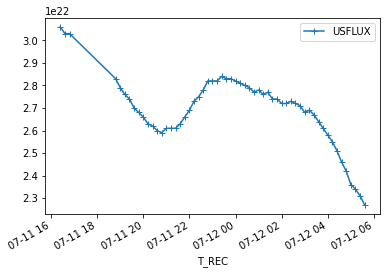

In [15]:
# plot from the given indexes:
time_property.iloc[starting_index:ending_index].plot(y=property_column, x='T_REC',marker='+')